## Master in Science in Data Analytics for Business
CA1 
- Data Preparation & Visualisation
- Machine Learning

**Student:** Wendy Paola Espinoza Potoy ID: 2021133

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Add the dataset to analysis data
#Add list with variables to missing values
#Define data type of the column "VALUE" as fload to avoid future issues

missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
Child_mortality = pd.read_csv("Infant and Neonatal Mortality.csv", na_values = missing_value_formats,  dtype={'VALUE': float})

# Exploratory Data Analysis

In [3]:
#Check the 5 first rows of the dataset
Child_mortality.head()

,Statistic Label,Year,Age Range,Principal Cause of Death,Area,UNIT,VALUE
0,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,Number,NaN
1,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,Number,5.0
2,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,Number,NaN
3,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,Number,1.0
4,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,Number,NaN


In [4]:
#Check shape of the data in this case dataset has 67392 rows and 7 columns
Child_mortality.shape

(67392, 7)

In [5]:
#Check information general of the dataset (data types, range of index, information of the columns and the memory used)
Child_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67392 entries, 0 to 67391
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           67392 non-null  object 
 1   Year                      67392 non-null  int64  
 2   Age Range                 67392 non-null  object 
 3   Principal Cause of Death  67392 non-null  object 
 4   Area                      67392 non-null  object 
 5   UNIT                      67392 non-null  object 
 6   VALUE                     16022 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.6+ MB


In [6]:
#Check the measures of central tendency and measures of dispersion 
Child_mortality.describe()

,Year,VALUE
count,67392.000000,16022.000000
mean,1999.000000,2.461748
std,11.254712,4.580705
min,1980.000000,0.050000
25%,1989.000000,1.000000
50%,1999.000000,1.200000
75%,2009.000000,2.667500
max,2018.000000,99.000000


In [7]:
#Check the unique values of each columns in the dataset.
Child_mortality.nunique()

Statistic Label               2
Year                         39
Age Range                     4
Principal Cause of Death      8
Area                         27
UNIT                          2
VALUE                       635
dtype: int64

In [8]:
#Check  name of variable in "UNIT" Column
unique_values = Child_mortality['UNIT'].unique()
print(unique_values)

['Number' 'Rate']


In [9]:
#Check the data types of the dataset to see how many differents dtypes 
#exist and if is required to transform to a different one for further analysis. 
Child_mortality.dtypes 

Statistic Label              object
Year                          int64
Age Range                    object
Principal Cause of Death     object
Area                         object
UNIT                         object
VALUE                       float64
dtype: object

In [10]:
#Check missing values this fucntion will check all the null values and each column and sum up them. 
#51370 missing values were detected in "VALUE" column
Child_mortality.isnull().sum()

Statistic Label                 0
Year                            0
Age Range                       0
Principal Cause of Death        0
Area                            0
UNIT                            0
VALUE                       51370
dtype: int64

In [11]:
#This function is used to returs the numbers of times that a value appear in a list in the dataset. 
# Counting missing values =16022 in "VALUE" column
Child_mortality.count() 

Statistic Label             67392
Year                        67392
Age Range                   67392
Principal Cause of Death    67392
Area                        67392
UNIT                        67392
VALUE                       16022
dtype: int64

In [12]:
#This function will show if there is any rows or colums that containing duplicate data.
duplicate_rows_df = Child_mortality[Child_mortality.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)


number of duplicate rows: (0, 7)


## Cleaning the data

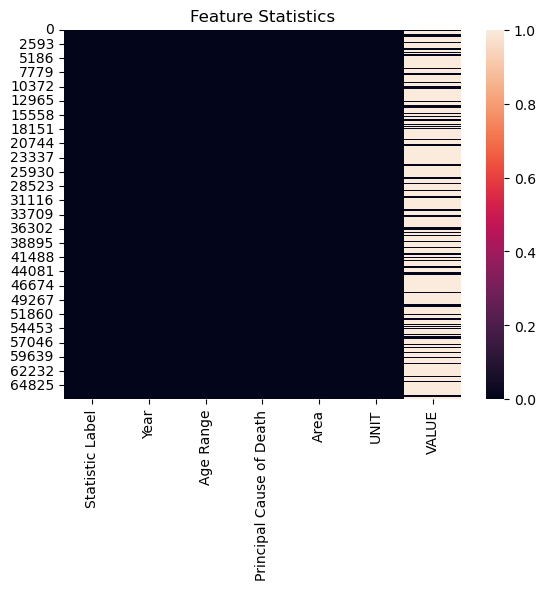

In [13]:
#This heatmap will show a visual representation of the missing value in the dataset
#It is posible to observe there is only one column with missing values = VALUE 
sns.heatmap(Child_mortality.isnull())
plt.title("Feature Statistics")
plt.savefig("Mortality_rate", bbox_inches='tight', pad_inches=0.5)

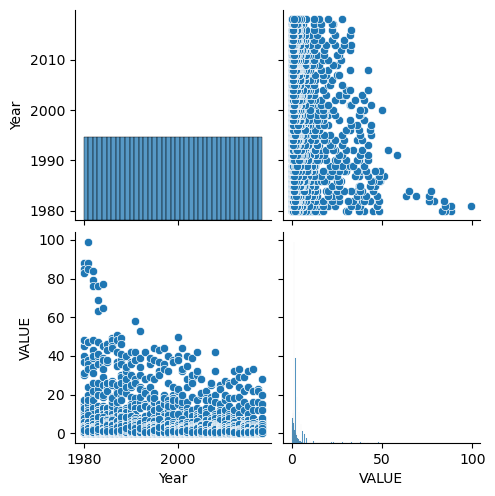

In [14]:
#Using a pairplot to check correlation
#However,there is not a good correlation between numerical variables. 
sns.pairplot(Child_mortality)

In [15]:
#Creating new dataframes using the loc fuction to select the UNIT Column and split the variable Number and Rate into 2 new dataframes. 

Number = Child_mortality.loc[Child_mortality['UNIT']=='Number']
Rate = Child_mortality.loc[Child_mortality['UNIT']=='Rate' ] 

In [16]:
#checking first 5 rows
Number.head()

,Statistic Label,Year,Age Range,Principal Cause of Death,Area,UNIT,VALUE
0,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,Number,NaN
1,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,Number,5.0
2,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,Number,NaN
3,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,Number,1.0
4,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,Number,NaN


In [17]:
#checking first 5 rows
Rate.head()

,Statistic Label,Year,Age Range,Principal Cause of Death,Area,UNIT,VALUE
33696,"Deaths per 1,000 Live Births",1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,Rate,NaN
33697,"Deaths per 1,000 Live Births",1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,Rate,0.24
33698,"Deaths per 1,000 Live Births",1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,Rate,NaN
33699,"Deaths per 1,000 Live Births",1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,Rate,0.71
33700,"Deaths per 1,000 Live Births",1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,Rate,NaN


In [18]:
#Checking new shape of the dataframes created. Now the data was reduce to 33696 rows and 7 columns. Half of the rows of the previous dataset.
Number.shape

(33696, 7)

In [19]:
#Checking new shape of the dataframes created
Rate.shape

(33696, 7)

In [20]:
#Merging the new dataframes created into One using the merge fuction and "on" preposition as references common columns to combine dataframes. 
Mortality_rate = pd.merge(Number, Rate, on=["Year","Age Range","Principal Cause of Death", "Area", ])
Mortality_rate.shape

(33696, 10)

In [21]:
#Checking the 5 first rows of the new dataframe.  
#Posible to observe the columns "Year","Age Range","Principal Cause of Death", "Area" where not duplicated but columns were created for diferents columns.

Mortality_rate.head()

,Statistic Label_x,Year,Age Range,Principal Cause of Death,Area,UNIT_x,VALUE_x,Statistic Label_y,UNIT_y,VALUE_y
0,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN
1,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,Number,5.0,"Deaths per 1,000 Live Births",Rate,0.24
2,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN
3,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,Number,1.0,"Deaths per 1,000 Live Births",Rate,0.71
4,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN


In [22]:
#Using the drop function to eliminate innesesary columns that won't be use it for analysis. 
Mortality_rate = Mortality_rate.drop(["Statistic Label_y", "UNIT_x", "UNIT_y","Statistic Label_x"], axis=1)
Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,VALUE_x,VALUE_y
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,NaN,NaN
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.24
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,NaN,NaN
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.71
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,NaN,NaN


In [23]:
#Uisng rename fuction to update/rename the name of the columns to have a better description of the values. 

Mortality_rate = Mortality_rate.rename(columns={"Statistic Label_x":"Statistic Label", "VALUE_x": "Number", "VALUE_y":"Rate" })
Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,Number,Rate
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,NaN,NaN
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.24
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,NaN,NaN
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.71
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,NaN,NaN


In [24]:
Mortality_rate.shape

(33696, 6)

In [25]:
#Checking missing values of the new dataset Mortality_rate
#Column Number and Rate has 25685 missing values. 
Mortality_rate.isnull().sum()

Year                            0
Age Range                       0
Principal Cause of Death        0
Area                            0
Number                      25685
Rate                        25685
dtype: int64

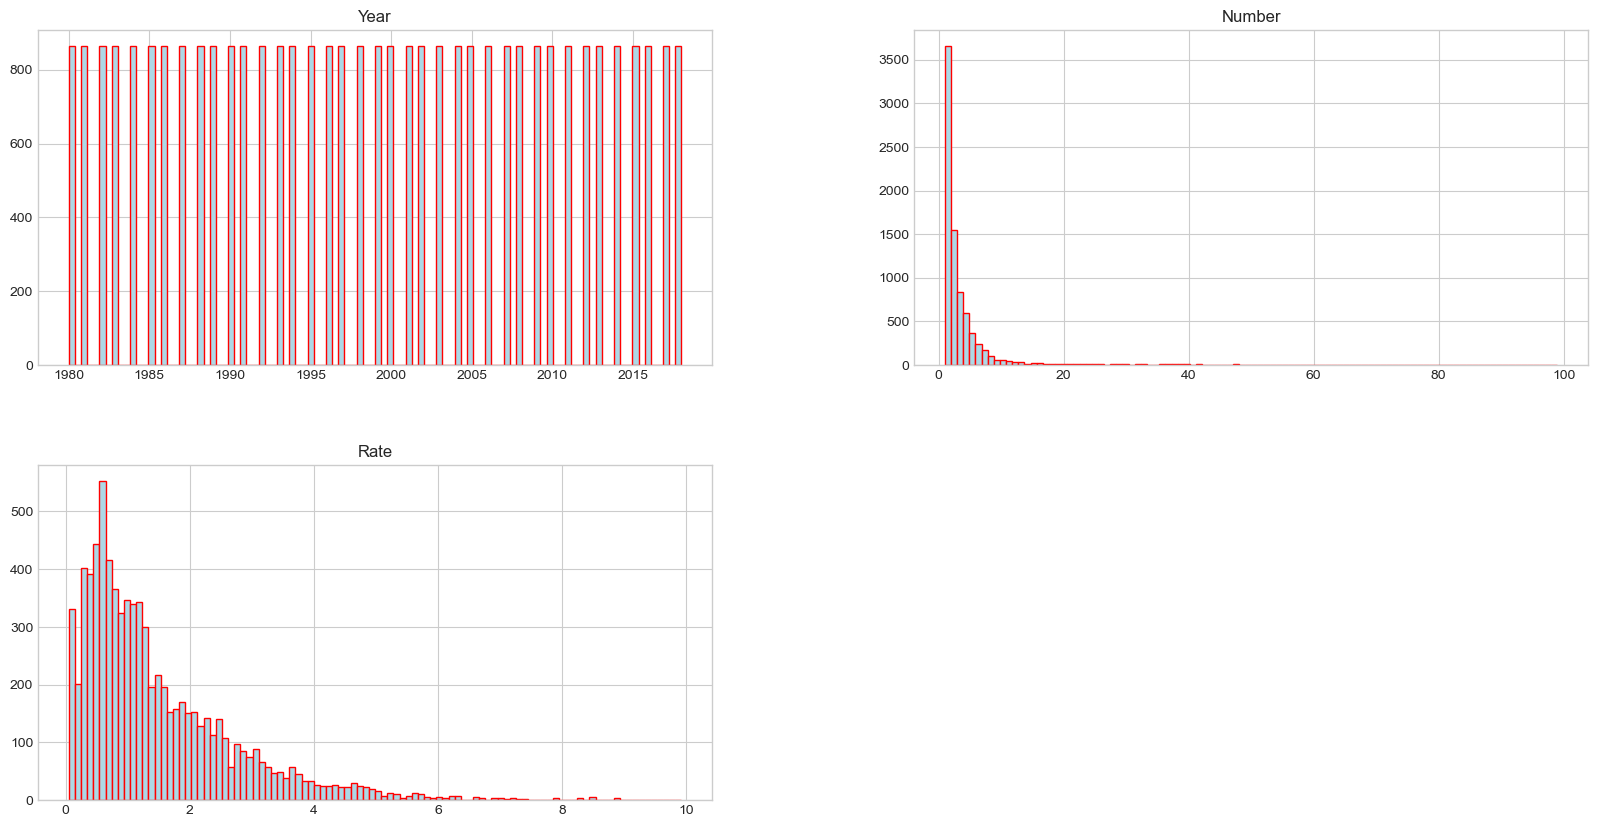

In [26]:
#Checking dustribution of the numerical data using the histograms plots. 
#It is posible to observe the  variables are skewed to the right meaning most of the data are positive values. 
plt.style.use('seaborn-whitegrid')
Mortality_rate.hist(bins=100, figsize=(20,10), color='lightblue', edgecolor = 'red')
plt.show()

# Handling Missing values 

In [27]:
#Using interpolation method to handle missing values. 
#This method was selected as the numerical data is skewed to the rigth side, checking between using the median or the interpolate method the last one had better results as with the median the shape of the data changed completly.  
Mortality_rate['Number'].interpolate(method='linear', direction = 'forward', inplace=True) 
print(Mortality_rate['Number'].head(10)) 

0    NaN
1    5.0
2    3.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: Number, dtype: float64


In [28]:
##Using interpolation to handle missing values
Mortality_rate['Rate'].interpolate(method='linear',
                                   direction = 'forward', inplace=True) 
print(Mortality_rate['Rate'].head(10)) 

0      NaN
1    0.240
2    0.475
3    0.710
4    0.645
5    0.580
6    0.515
7    0.450
8    0.560
9    0.670
Name: Rate, dtype: float64


In [29]:
#Checking null values
Mortality_rate.isnull().sum()

Year                        0
Age Range                   0
Principal Cause of Death    0
Area                        0
Number                      1
Rate                        1
dtype: int64

In [30]:
#Dropping null values
Mortality_rate = Mortality_rate.dropna()
Mortality_rate.count() 


Year                        33695
Age Range                   33695
Principal Cause of Death    33695
Area                        33695
Number                      33695
Rate                        33695
dtype: int64

In [31]:
#checking first 5 rows
Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,Number,Rate
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.240
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,3.0,0.475
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.710
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,1.0,0.645
5,1980,Infant (0-1 year),Infectious and parasitic diseases,Longford,1.0,0.580


# Outliers

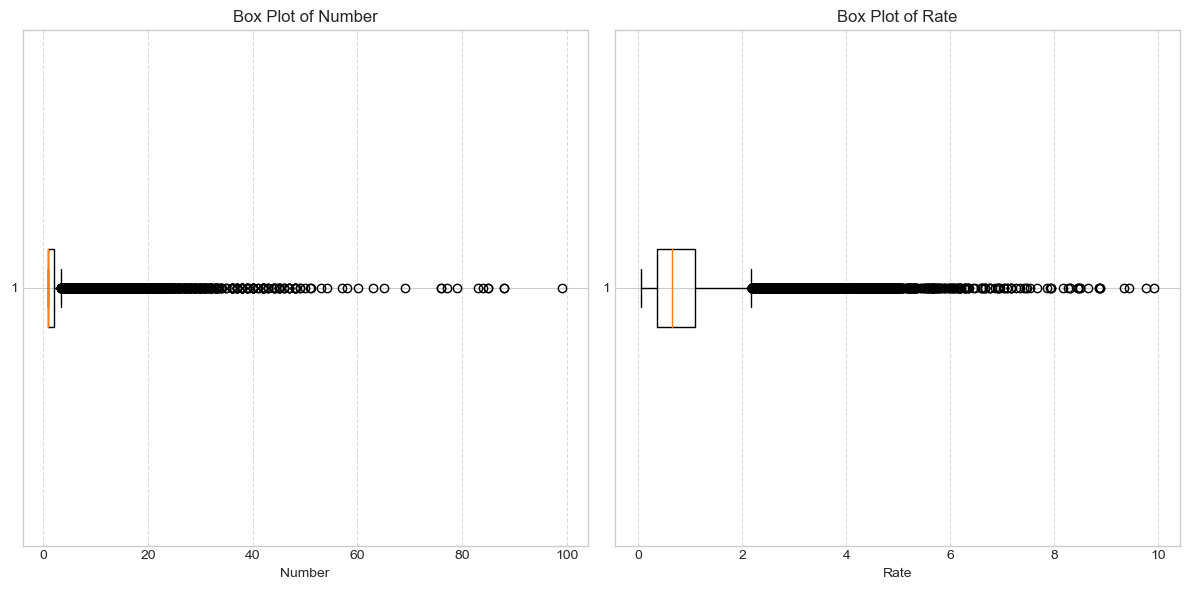

In [32]:
#Checking outliers of the numerical data by using a boxplot to have a visual representation of the outliers in this Columns

plt.figure(figsize=(12, 6))

# Create a box plot for "Rate"
plt.subplot(1, 2, 1)  # Create a subplot for the "Rate" box plot

plt.boxplot(Mortality_rate["Number"], vert=False)
plt.title("Box Plot of Number")
plt.xlabel("Number")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Create a box plot for "Number"
plt.subplot(1, 2, 2)  # Create a subplot for the "Number" box plot
plt.boxplot(Mortality_rate["Rate"], vert=False)
plt.title("Box Plot of Rate")
plt.xlabel("Rate")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Outliers were not removed because it was affected accurary of the models. 

# Data visualization

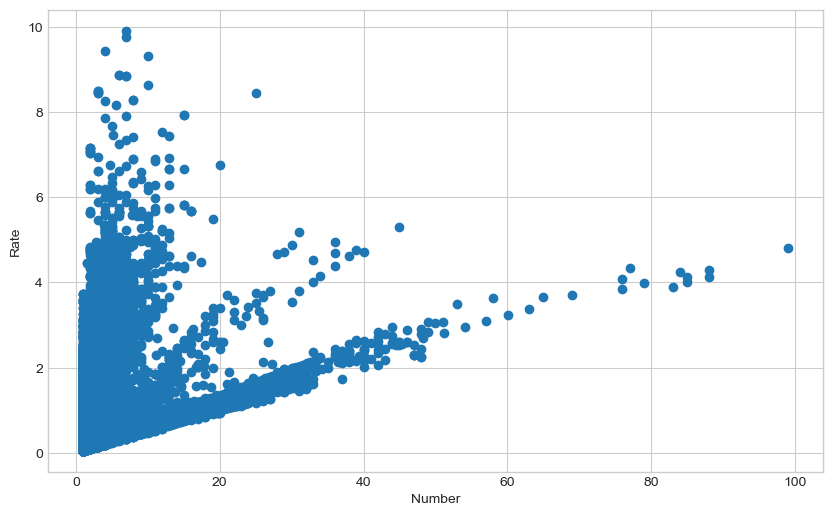

In [33]:
# Plotting a scatter plot 
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(Mortality_rate["Number"], Mortality_rate["Rate"]) 
ax.set_xlabel("Number") 
ax.set_ylabel("Rate") 
plt.show() 

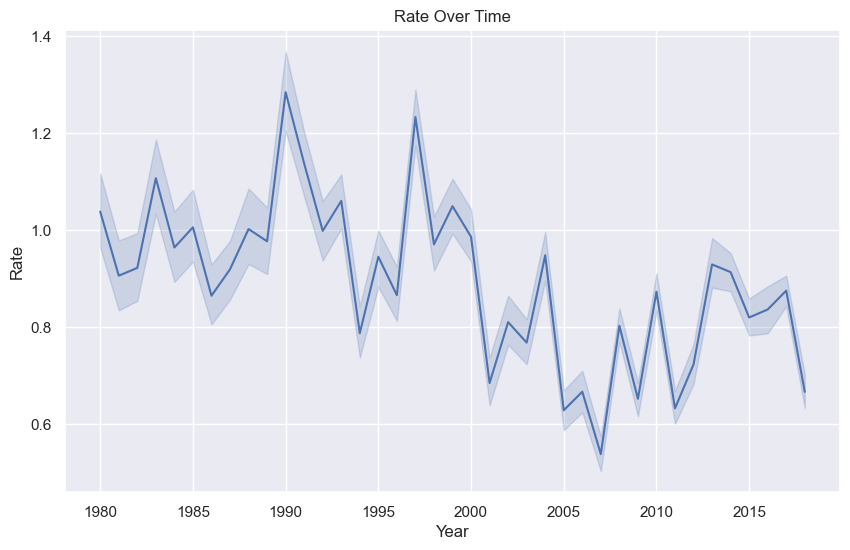

In [34]:
#Plotting a line plot to visualised Rate values over the time
sns.set_theme()
plt.figure(figsize=(10, 6))
sns.lineplot(data=Mortality_rate, x="Year", y="Rate")
plt.title("Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.grid(True)

# Show the plot
plt.show()

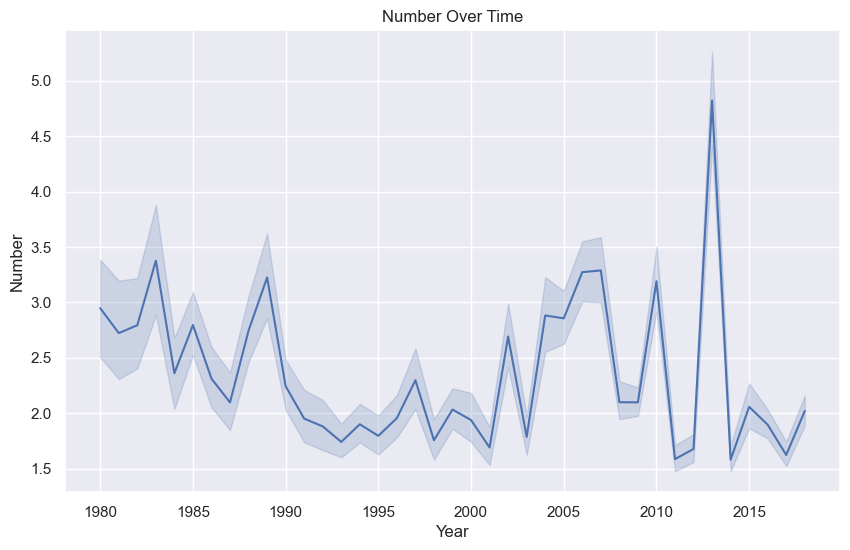

In [35]:
#Plotting a line plot to visualised Number values over the time
plt.figure(figsize=(10, 6))
sns.lineplot(data=Mortality_rate, x="Year", y="Number")
plt.title("Number Over Time")
plt.xlabel("Year")
plt.ylabel("Number")
plt.grid(True)

# Show the plot
plt.show()

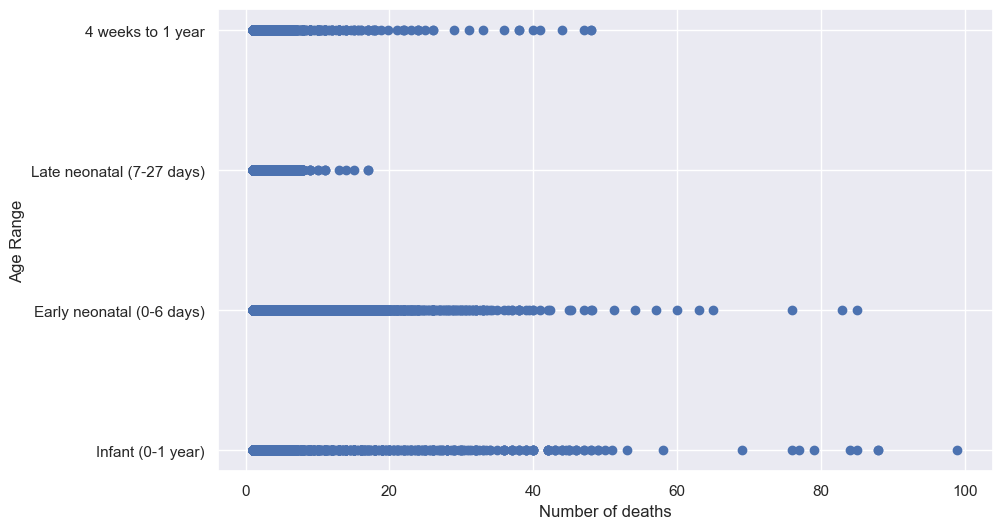

In [36]:
# Plotting a scatter plot  to check relationship of Age range Variable with number of deaths 
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(Mortality_rate["Number"], Mortality_rate["Age Range"]) 
ax.set_xlabel("Number of deaths") 
ax.set_ylabel("Age Range") 
plt.show() 

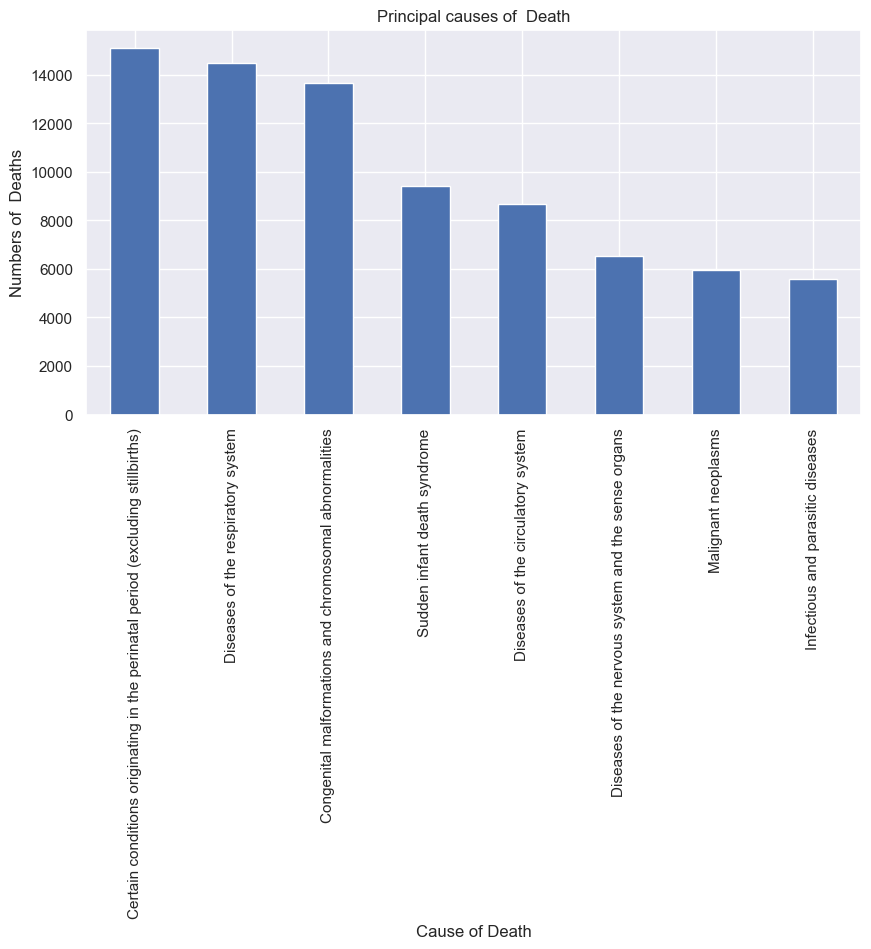

In [37]:
#Plotting a bar plot to check a sort bar graph of the Causes of deaths with more number of deaths.
top_causes = Mortality_rate.groupby('Principal Cause of Death')['Number'].sum().nlargest(8)
# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
top_causes.plot(kind='bar')

# Personalizar el título y etiquetas
plt.title("Principal causes of  Death")
plt.ylabel("Numbers of  Deaths")
plt.xlabel("Cause of Death")

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

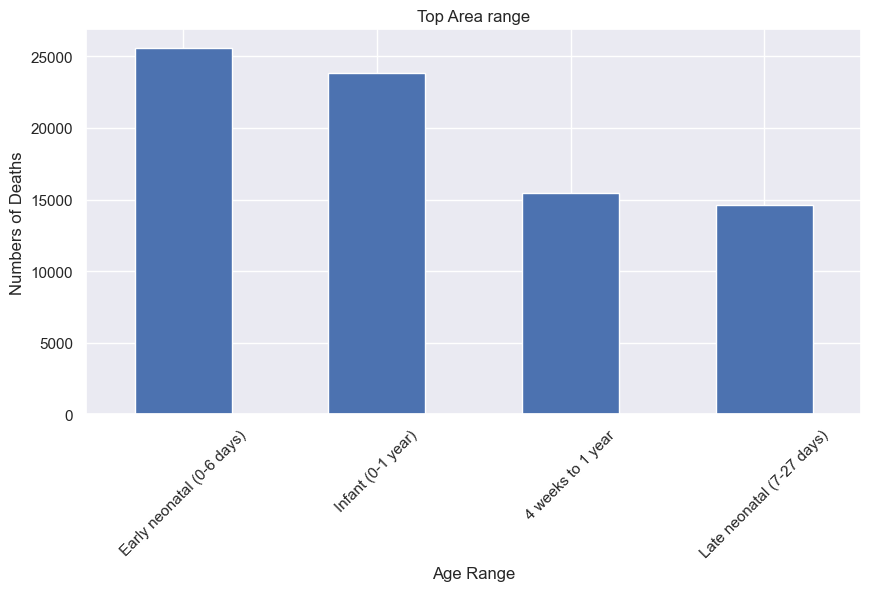

In [38]:
#Plotting a bar plot to check a sort bar graph of the age range with more number of deaths.
top_causes = Mortality_rate.groupby('Age Range')['Number'].sum().nlargest()
# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
top_causes.plot(kind='bar')

# Personalizar el título y etiquetas
plt.title("Top Area range")
plt.ylabel("Numbers of Deaths")
plt.xlabel("Age Range")

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

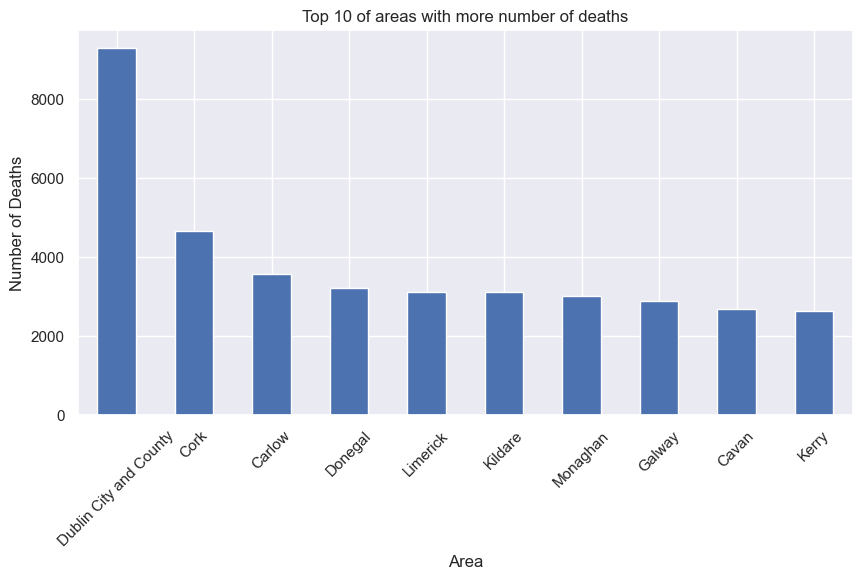

In [39]:
#Plotting a bar plot to check a sort bar graph of Areas with more number of deaths.
top_causes = Mortality_rate.groupby('Area')['Number'].sum().nlargest(10)
# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
top_causes.plot(kind='bar')

# Personalizar el título y etiquetas
plt.title("Top 10 of areas with more number of deaths")
plt.ylabel("Number of Deaths")
plt.xlabel("Area")

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

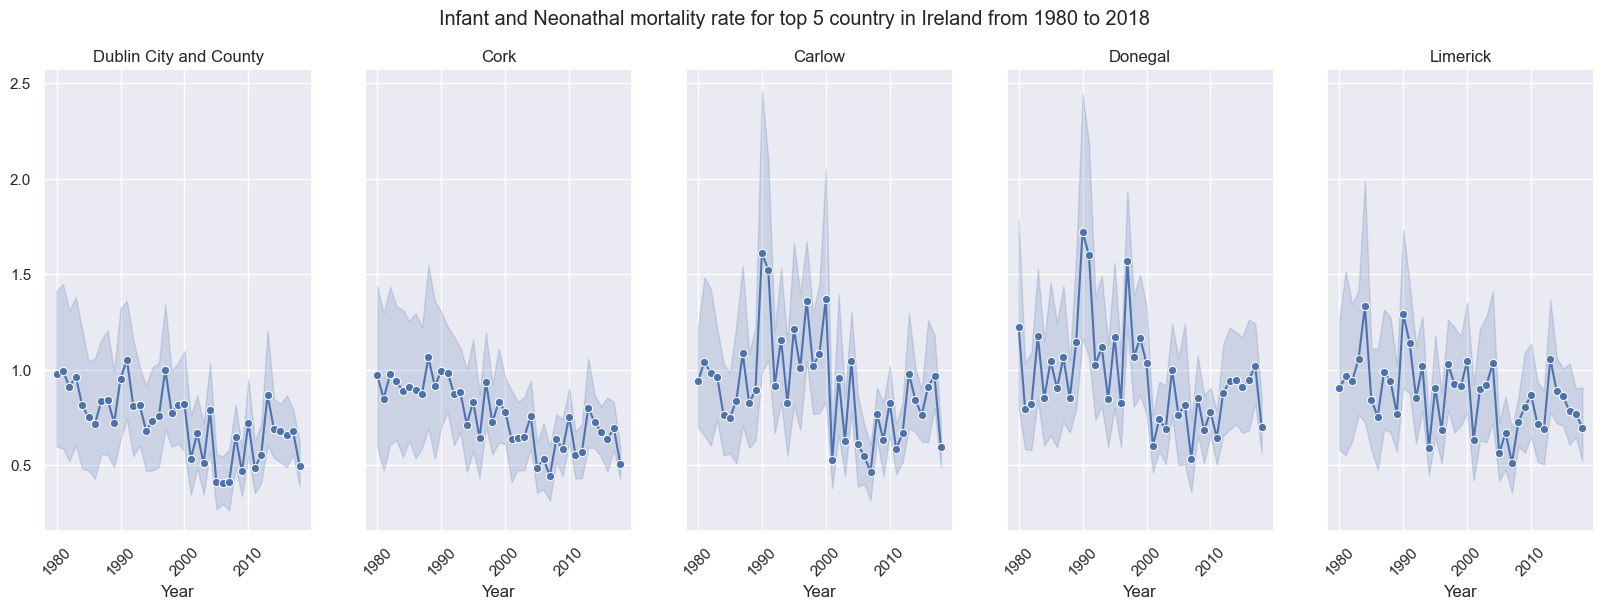

In [40]:
# Checking the 5 areas with more number of deaths over the time
l=['Dublin City and County', 'Cork', 'Carlow','Donegal','Limerick']
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)
for i in range(len(l)):
    df = Mortality_rate[Mortality_rate['Area']==l[i]]
    sns.lineplot(data=df,x='Year',y='Rate',ax=axes[i],marker='o')
    axes[i].set_ylabel("")
    axes[i].set_title(l[i])
    axes[i].tick_params(axis='x', rotation=45)
fig.suptitle("Infant and Neonathal mortality rate for top 5 country in Ireland from 1980 to 2018")
fig.show()

[Text(0.5, 1.0, 'Mortality rate in Ireland by County')]

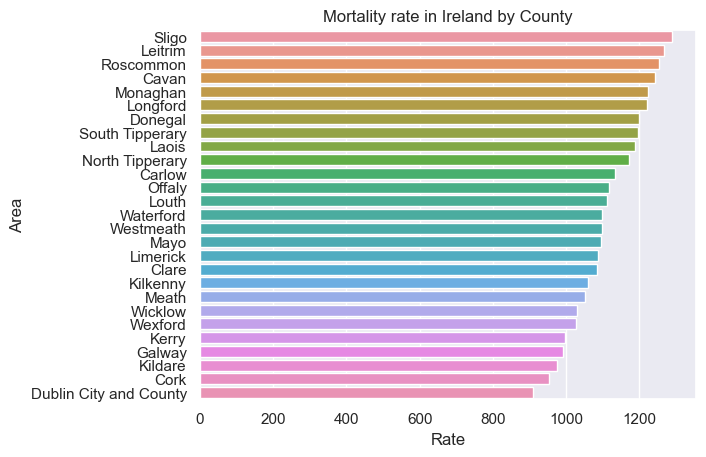

In [41]:
#Create a barplot showing the areas with the highest mortality rate 
location =Mortality_rate.groupby(['Area']).sum().reset_index().sort_values(by='Rate',ascending=False)
#location=Mortality_rate.groupby(['Area']).mean().reset_index().sort_values(by='Rate',ascending=False)

sns.barplot(location, x="Rate", y="Area", orient="h") .set(title= "Mortality rate in Ireland by County")

[Text(0.5, 1.0, 'Number of deaths in Ireland by County')]

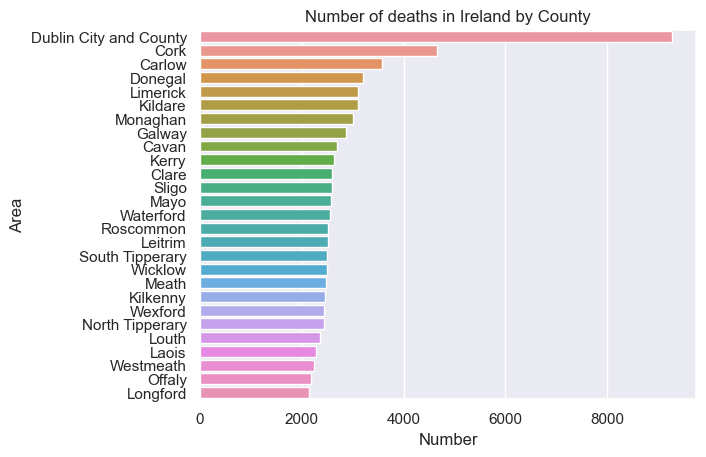

In [42]:
#Create a barplot showing the areas with the highest number of infant and neonathal deaths. 
location =Mortality_rate.groupby(['Area']).sum().reset_index().sort_values(by='Number',ascending=False)
#location=Mortality_rate.groupby(['Area']).mean().reset_index().sort_values(by='Rate',ascending=False)

sns.barplot(location, x="Number", y="Area", orient="h") .set(title= "Number of deaths in Ireland by County")

# Scaling - Hot Enconding

In [43]:
#Creating new dataframe selection only numerical values
#rates_number =Mortality_rate.select_dtypes("Float64", "int64")
#print(rates_number)

In [44]:
#Creating new dataframe selection only numerical values
Data_num = Mortality_rate[['Year','Number', 'Rate' ]]
Data_num

,Year,Number,Rate
1,1980,5.0,0.2400
2,1980,3.0,0.4750
3,1980,1.0,0.7100
4,1980,1.0,0.6450
5,1980,1.0,0.5800
...,...,...,...
33691,2018,1.0,1.0425
33692,2018,1.0,1.2900
33693,2018,1.0,1.2900
33694,2018,1.0,1.2900


In [45]:
#Creating new dataframe selection only numerical values
Mortality_rate_objects =Mortality_rate.select_dtypes(object)
print(Mortality_rate_objects)

               Age Range           Principal Cause of Death  \
1      Infant (0-1 year)  Infectious and parasitic diseases   
2      Infant (0-1 year)  Infectious and parasitic diseases   
3      Infant (0-1 year)  Infectious and parasitic diseases   
4      Infant (0-1 year)  Infectious and parasitic diseases   
5      Infant (0-1 year)  Infectious and parasitic diseases   
...                  ...                                ...   
33691  4 weeks to 1 year       Sudden infant death syndrome   
33692  4 weeks to 1 year       Sudden infant death syndrome   
33693  4 weeks to 1 year       Sudden infant death syndrome   
33694  4 weeks to 1 year       Sudden infant death syndrome   
33695  4 weeks to 1 year       Sudden infant death syndrome   

                         Area  
1      Dublin City and County  
2                     Kildare  
3                    Kilkenny  
4                       Laois  
5                    Longford  
...                       ...  
33691              

In [46]:
#LABEL ENCONDING
from sklearn.preprocessing import LabelEncoder

In [47]:
#creating the storing of label encoding
le =LabelEncoder()

In [48]:
le.fit_transform(Mortality_rate_objects ["Area"])

array([ 5,  8,  9, ...,  1,  4, 17])

In [49]:
#creating a **for** loop to transform (hot encoding) all the values in Mortality_rate_objects at the same tome
for col in Mortality_rate_objects:
    le =LabelEncoder()
    Mortality_rate_objects[col]=le.fit_transform(Mortality_rate_objects[col])
    

In [50]:
#show new dataframe with encoding data
Mortality_rate_objects.head(10)

,Age Range,Principal Cause of Death,Area
1,2,5,5
2,2,5,8
3,2,5,9
4,2,5,10
5,2,5,13
6,2,5,14
7,2,5,16
8,2,5,19
9,2,5,24
10,2,5,25


In [51]:
#create new dataframe to merge new encoding dataframes
Mortality_rate_scale = pd.merge(Mortality_rate_objects, Data_num, left_index=True, right_index=True, suffixes=("_l", "_r"))
Mortality_rate_scale.head()

,Age Range,Principal Cause of Death,Area,Year,Number,Rate
1,2,5,5,1980,5.0,0.240
2,2,5,8,1980,3.0,0.475
3,2,5,9,1980,1.0,0.710
4,2,5,10,1980,1.0,0.645
5,2,5,13,1980,1.0,0.580


In [52]:
#checking the shape of the new dataframe
Mortality_rate_scale.shape

(33695, 6)

# Machine Learning

## Random forest Regression

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [54]:
# Declaration of Variables
X = Mortality_rate_scale.drop(["Rate"], axis=1)
y = Mortality_rate_scale["Rate"].values

# Use train_test_split method to split the data into 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [55]:
# Creating an object forest by calling a method RandomForestRegressor()

forest = RandomForestRegressor(n_estimators = 200, 
                               criterion='squared_error',
                               random_state = 0, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Calculate Mean Squared Error (MSE) and e R-squared (R2)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared(R2)Score: {r2}")

Mean Squared Error: 0.01584266179839485
R-squared(R2)Score: 0.9783838827144922


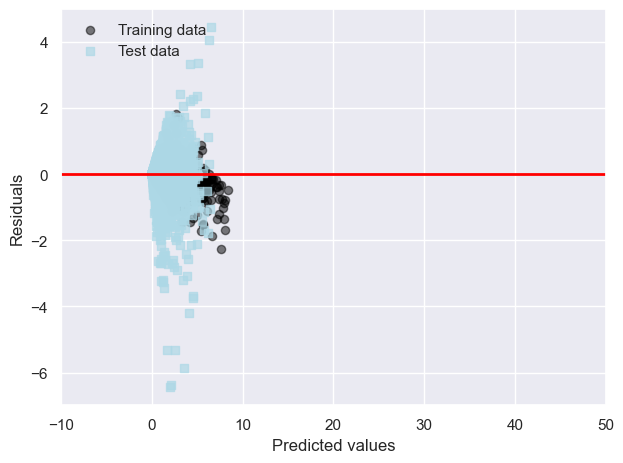

In [56]:
# Create a scatter plot to show performance of the model

plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c = 'black', 
            marker = 'o', 
            s = 35,
            alpha = 0.5,
            label = 'Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c = 'lightblue', 
            marker = 's', 
            s = 35,
            alpha = 0.7,
            label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Declaration of Variables
X = Mortality_rate_scale.drop(["Rate"], axis=1)
y = Mortality_rate_scale["Rate"].values

# Create a RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

# Define a parameter grid with the values to search
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200]
}

# Using GridSearchCV to find the optimal number of trees
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X, y)

# Print the best parameters and corresponding mean squared error
print("Best Parameters:", grid_search.best_params_)
print("Best Mean Squared Error:", grid_search.best_score_)

# Optional: Calculate R-squared for the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X)
r2_best = r2_score(y, y_pred_best)

print("R-squared for the Best Model:", r2_best)

Best Parameters: {'n_estimators': 200}
Best Mean Squared Error: -0.36396471443477535
R-squared for the Best Model: 0.9797911888893374


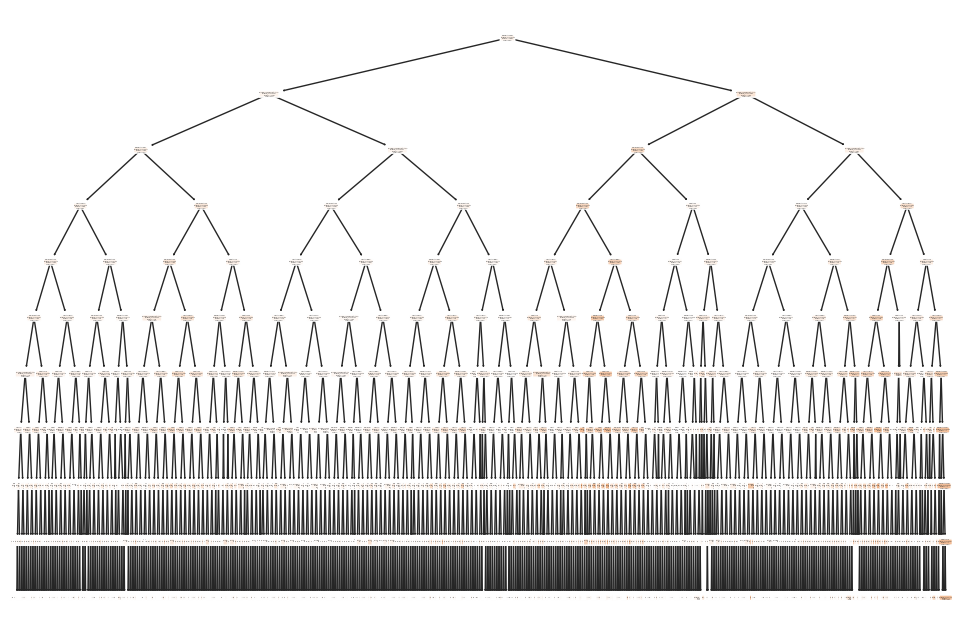

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Declaration of Variables
X = Mortality_rate_scale.drop(["Rate"], axis=1)
y = Mortality_rate_scale["Rate"].values 

# Use train_test_split method to split the data into 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Initialize the DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X, y)

# Sort the data for plotting
sort_idx = X[X.columns[0]].argsort()

# Convert Index to list for feature_names parameter
feature_names_list = X.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, rounded=True, feature_names=feature_names_list)
plt.show()

In [59]:
y_pred = tree.predict(X)

# Calculate Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 0.1960207968879358
R-squared (R2) Score: 0.7300540072209927


In [60]:
# Declare the variables
X = Mortality_rate_scale.drop(["Rate"], axis=1)
y = Mortality_rate_scale["Rate"].values 

# Initialize the DecisionTreeRegressor
tree = DecisionTreeRegressor()

# Define a parameter grid to search
param_grid = {'max_depth': [None, 5, 10, 15, 20]}  # Ajusta estos valores según tu necesidad

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters for max depth
best_params = grid_search.best_params_

# Get the best mse parameters
best_mse = -grid_search.best_score_

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Best MSE:", best_mse)
print("R-squared (R2) Score:", r2)

Best Parameters: {'max_depth': 10}
Best MSE: 0.40544050130999276
R-squared (R2) Score: 0.7300540072209927


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Declaration of Variables
X = Mortality_rate_scale.drop(["Rate"], axis=1)
y = Mortality_rate_scale["Rate"].values 

# Value range for n_estimators
n_estimators_values = [10, 50, 100, 150, 200]

#Storing results of the cross validation 
cv_results = []

# Validation fo cross validation for each estimator

for n_estimators in n_estimators_values:
    
    # Creating the Random Forest model
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    
    # Apply a cross validation out-of-bag (OOB)
    scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # storing result
    cv_results.append((n_estimators, np.mean(scores)))

# Printing results
for n_estimators, mse in cv_results:
    print(f'n_estimators={n_estimators}, Mean Squared Error (MSE): {mse}')


n_estimators=10, Mean Squared Error (MSE): -0.3817199289004772
n_estimators=50, Mean Squared Error (MSE): -0.3650250974205891
n_estimators=100, Mean Squared Error (MSE): -0.36592890541673817
n_estimators=150, Mean Squared Error (MSE): -0.36461468692035337
n_estimators=200, Mean Squared Error (MSE): -0.36396471443477535


In [62]:
# Declaration of Variables
X = Mortality_rate_scale.drop(["Rate"], axis=1)
y = Mortality_rate_scale["Rate"].values 

# Value range for max_depth (parameter for Decision Tree)
max_depth_values = [None, 5, 10, 15, 20]

# Storing results of the cross-validation 
cv_results = []

# Validation for cross-validation for each max_depth
for max_depth in max_depth_values:
    
    # Creating the Decision Tree model
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
    
    # Apply cross-validation
    scores = cross_val_score(dt, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Storing result
    cv_results.append((max_depth, np.mean(scores)))

# Printing results
for max_depth, mse in cv_results:
    print(f'max_depth={max_depth}, Mean Squared Error (MSE): {mse}')



max_depth=None, Mean Squared Error (MSE): -0.5134393183068179
max_depth=5, Mean Squared Error (MSE): -0.41123351615351644
max_depth=10, Mean Squared Error (MSE): -0.40305738502943944
max_depth=15, Mean Squared Error (MSE): -0.4936684719173029
max_depth=20, Mean Squared Error (MSE): -0.5071377717958758
